In [2]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [15]:
import pandas as pd

df = pd.read_csv('listings.csv')
#df.head()

In [5]:
# Select only relevant columns and drop NaNs
df = df[['latitude', 'longitude', 'room_type']].dropna()

# Encode room_type into numeric labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['room_label'] = le.fit_transform(df['room_type'])  # E.g., Entire home/apt → 0, etc.

# Final features and labels
X = df[['latitude', 'longitude']]
y = df['room_label']

In [6]:
#A1

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion Matrices and Reports
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))

print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

#this model is overfit as accuracy for train is 81% and test is 66% and there is a drop of 15%

Train Confusion Matrix:
 [[11385    16  2243     2]
 [   19   198     9     0]
 [ 2383    16  9005     4]
 [   88     0    34    23]]

Train Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83     13646
           1       0.86      0.88      0.87       226
           2       0.80      0.79      0.79     11408
           3       0.79      0.16      0.26       145

    accuracy                           0.81     25425
   macro avg       0.82      0.66      0.69     25425
weighted avg       0.81      0.81      0.81     25425


Test Confusion Matrix:
 [[4011   12 1765    1]
 [  22   80    7    0]
 [1804    8 3115   11]
 [  30    0   27    4]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69      5789
           1       0.80      0.73      0.77       109
           2       0.63      0.63      0.63      4938
           3       0.25      0.07  

In [10]:
#A2

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Remove "$", "," and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Optional: remove outliers (e.g., prices above $1000)
df = df[df['price'] < 1000]

# Use latitude & longitude as predictors (can change to other features)
X = df[['latitude', 'longitude']]
y = df['price']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 23989.69
Root Mean Squared Error (RMSE): 154.89
Mean Absolute Percentage Error (MAPE): 91.99%
R-squared (R²) Score: 0.08


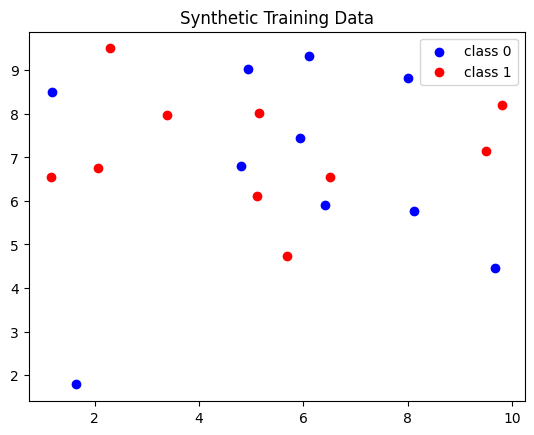

In [11]:
#A3

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_train_syn = np.random.uniform(1, 10, (20, 2))
y_train_syn = np.array([0]*10 + [1]*10)

plt.scatter(X_train_syn[:10, 0], X_train_syn[:10, 1], color='blue', label='class 0')
plt.scatter(X_train_syn[10:, 0], X_train_syn[10:, 1], color='red', label='class 1')
plt.title("Synthetic Training Data")
plt.legend()
plt.show()

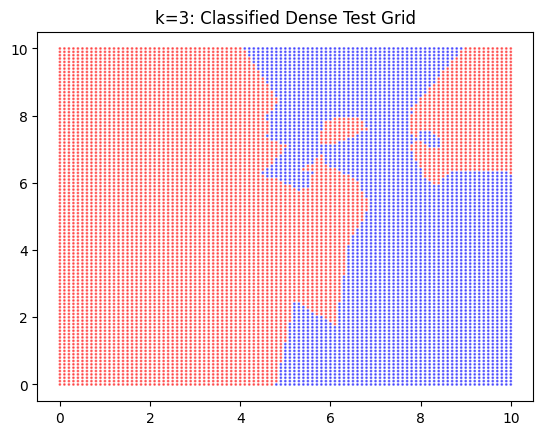

In [12]:
#A4

# Create test grid
x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
X_test_syn = np.array([[x, y] for x in x_vals for y in y_vals])

# Fit kNN and predict
knn_syn = KNeighborsClassifier(n_neighbors=3)
knn_syn.fit(X_train_syn, y_train_syn)
y_test_syn = knn_syn.predict(X_test_syn)

# Plot
plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, cmap='bwr', s=1, alpha=0.5)
plt.title("k=3: Classified Dense Test Grid")
plt.show()


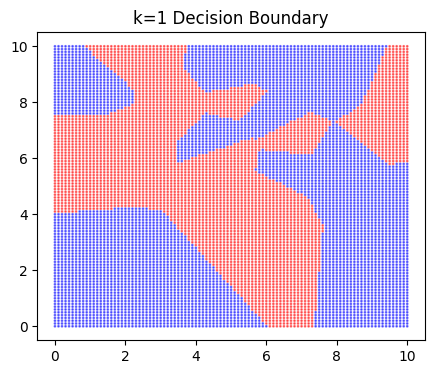

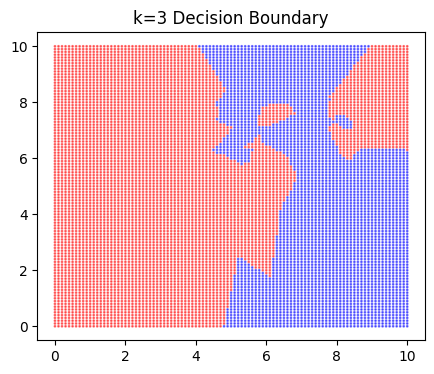

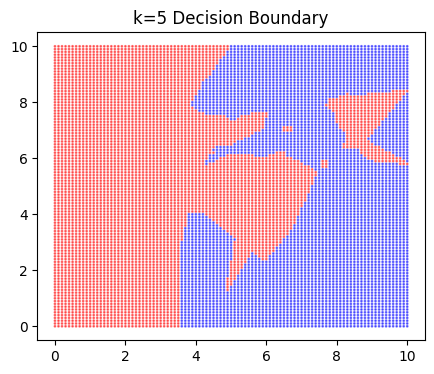

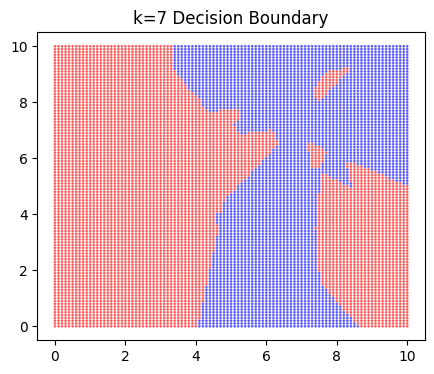

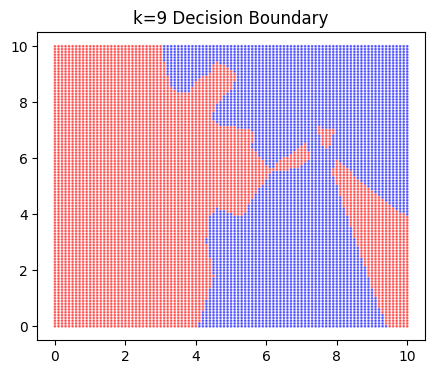

In [13]:
#A5

for k in [1, 3, 5, 7, 9]:
    knn_syn = KNeighborsClassifier(n_neighbors=k)
    knn_syn.fit(X_train_syn, y_train_syn)
    y_test_syn = knn_syn.predict(X_test_syn)

    plt.figure(figsize=(5, 4))
    plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, cmap='bwr', s=1, alpha=0.5)
    plt.title(f"k={k} Decision Boundary")
    plt.show()


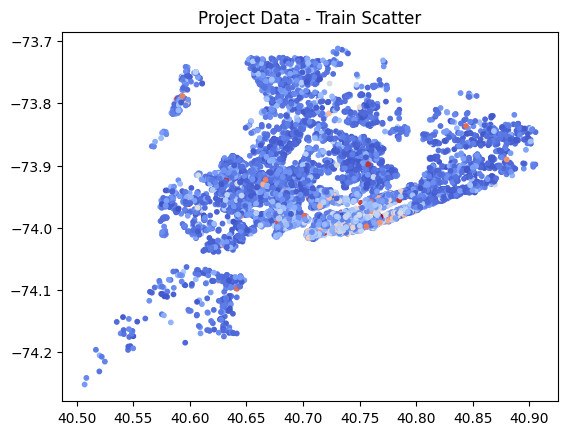

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


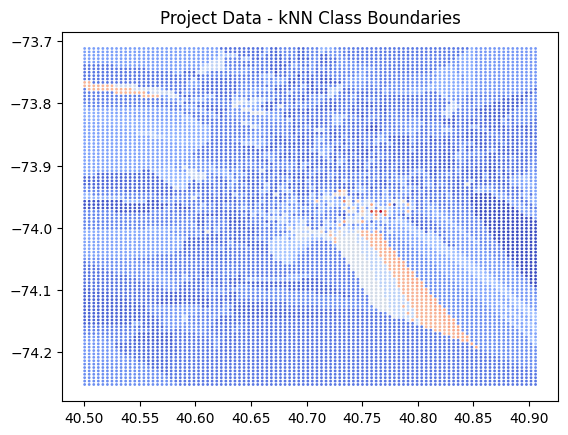

In [14]:
#A6

# Using 'latitude' and 'longitude' as features, 'room_label' as class

X_proj_train, X_proj_test, y_proj_train, y_proj_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn_proj = KNeighborsClassifier(n_neighbors=3)
knn_proj.fit(X_proj_train, y_proj_train)

# Plot training data
plt.scatter(X_proj_train['latitude'], X_proj_train['longitude'], c=y_proj_train, cmap='coolwarm', s=10)
plt.title("Project Data - Train Scatter")
plt.show()

# Dense grid
lat_vals = np.linspace(df['latitude'].min(), df['latitude'].max(), 100)
lon_vals = np.linspace(df['longitude'].min(), df['longitude'].max(), 100)
X_proj_dense = np.array([[lat, lon] for lat in lat_vals for lon in lon_vals])
y_proj_dense = knn_proj.predict(X_proj_dense)

plt.scatter(X_proj_dense[:, 0], X_proj_dense[:, 1], c=y_proj_dense, cmap='coolwarm', s=1)
plt.title("Project Data - kNN Class Boundaries")
plt.show()

In [16]:
#A7

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 20))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best cross-validation score:", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k value: 13
Best cross-validation score: 0.043364151506113925
